In [2]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


Sentiment Summary:
Sentiment Category
Positive    2556
Neutral     1482
Negative     962
Name: count, dtype: int64


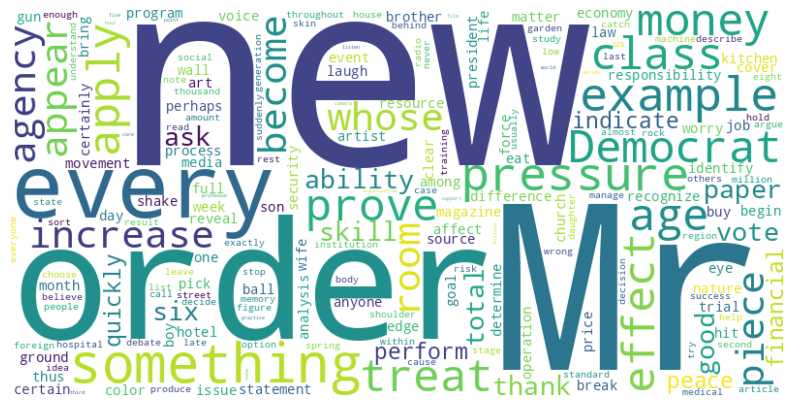


Top words per topic:

Topic #0:
['quite', 'popular', 'blood', 'make', 'deal', 'art', 'total', 'community', 'foreign', 'cover']

Topic #1:
['rock', 'career', 'degree', 'dinner', 'spring', 'increase', 'body', 'table', 'issue', 'stand']

Topic #2:
['order', 'daughter', 'apply', 'result', 'able', 'difference', 'rest', 'reflect', 'minute', 'billion']

Topic #3:
['market', 'remember', 'final', 'reduce', 'rate', 'machine', 'school', 'woman', 'loss', 'room']

Topic #4:
['leg', 'prevent', 'accept', 'girl', 'face', 'raise', 'box', 'significant', 'institution', 'grow']


In [3]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Load the dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Step 2: Sentiment Analysis using VADER
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_score(review):
    score = analyzer.polarity_scores(review)
    return score['compound']  # Returning the compound score which summarizes sentiment

# Apply sentiment analysis to the 'Review Text' column
df['Sentiment Score'] = df['Review Text'].apply(get_sentiment_score)

# Categorize the sentiment based on the score
df['Sentiment Category'] = df['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Sentiment summary
sentiment_summary = df['Sentiment Category'].value_counts()
print("Sentiment Summary:")
print(sentiment_summary)

# Step 3: Word Frequency Analysis - Word Cloud
# Combine all the review texts into one large string
text = ' '.join(df['Review Text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 4: Topic Modeling using Latent Dirichlet Allocation (LDA)
# Prepare the text data (remove stopwords)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review Text'].dropna())

# Apply LDA to find topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
terms = vectorizer.get_feature_names_out()
print("\nTop words per topic:")
for i, topic in enumerate(lda.components_):
    print(f"\nTopic #{i}:")
    print([terms[i] for i in topic.argsort()[-10:]])



In [6]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Sentiment categories from the NLP analysis (you can adjust based on the output of your analysis)
# Assigning numerical values to the sentiment categories
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# Assuming 'Sentiment Category' is the column where NLP sentiment is stored (change the column name if necessary)
df['Sentiment Score'] = df['Sentiment Category'].map(sentiment_map)

# Now, we can calculate the correlation between Sentiment Score and Rating
correlation = df[['Sentiment Score', 'Rating']].corr()

# Output the correlation result
print("Correlation between Sentiment Score and Customer Rating:")
print(correlation)

# To visualize the relationship more effectively:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a scatter plot to visualize the relationship between Sentiment and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sentiment Score', y='Rating', data=df)
plt.title('Sentiment vs. Customer Rating')
plt.xlabel('Sentiment Score (Positive=1, Neutral=0, Negative=-1)')
plt.ylabel('Customer Rating')
plt.show()

# Additionally, you can check the distribution of ratings for each sentiment category
rating_by_sentiment = df.groupby('Sentiment Category')['Rating'].describe()
print("\nRating Summary by Sentiment Category:")
print(rating_by_sentiment)


KeyError: 'Sentiment Category'

In [5]:
# Check the column names and the first few rows of the DataFrame
print(df.columns)
print(df.head())


Index(['Agent Name', 'Rating', 'Review Text', 'Delivery Time (min)',
       'Location', 'Order Type', 'Customer Feedback Type', 'Price Range',
       'Discount Applied', 'Product Availability', 'Customer Service Rating',
       'Order Accuracy'],
      dtype='object')
  Agent Name  Rating                                        Review Text  \
0      Zepto     4.5  Purpose boy job cup decision girl now get job ...   
1      Zepto     2.1  Prevent production able both the box school wa...   
2    JioMart     4.5  Family station listen agreement more kitchen l...   
3    JioMart     2.6  World north people area everything enter beyon...   
4      Zepto     3.6  Hand way yourself tax whether sister anyone ef...   

   Delivery Time (min)   Location  Order Type Customer Feedback Type  \
0                   58      Delhi  Essentials                Neutral   
1                   25    Lucknow     Grocery               Negative   
2                   54  Ahmedabad  Essentials                Neu

  Agent Name  Rating                                        Review Text  \
0      Zepto     4.5  Purpose boy job cup decision girl now get job ...   
1      Zepto     2.1  Prevent production able both the box school wa...   
2    JioMart     4.5  Family station listen agreement more kitchen l...   
3    JioMart     2.6  World north people area everything enter beyon...   
4      Zepto     3.6  Hand way yourself tax whether sister anyone ef...   

   Delivery Time (min)   Location  Order Type Customer Feedback Type  \
0                   58      Delhi  Essentials                Neutral   
1                   25    Lucknow     Grocery               Negative   
2                   54  Ahmedabad  Essentials                Neutral   
3                   22    Chennai  Essentials                Neutral   
4                   34       Pune    Pharmacy               Positive   

  Price Range Discount Applied Product Availability  Customer Service Rating  \
0        High              Yes      

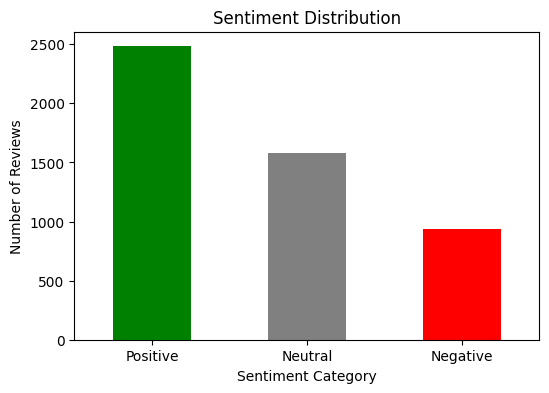

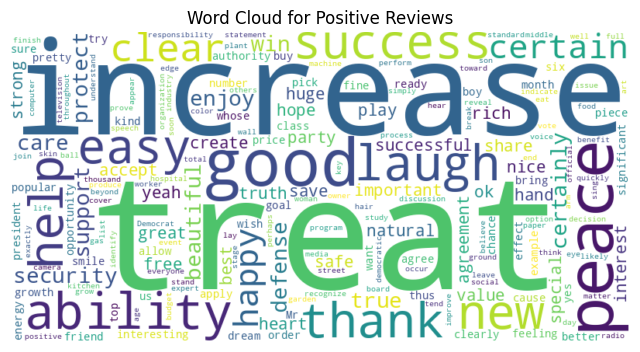

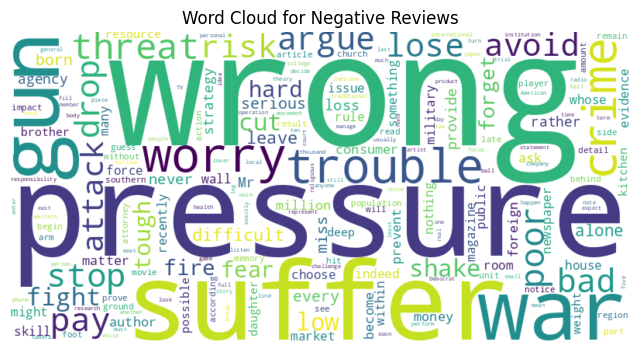

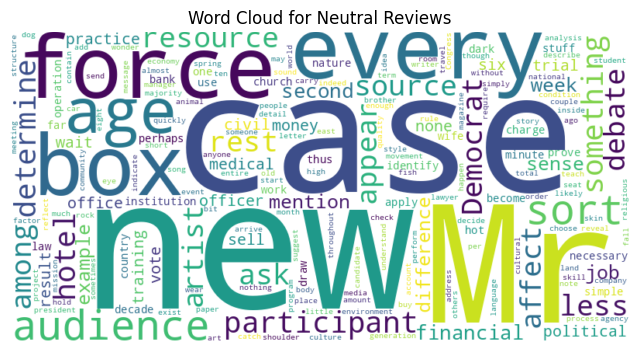


Correlation between Sentiment Score and Rating:
                 Sentiment Score    Rating
Sentiment Score         1.000000  0.003418
Rating                  0.003418  1.000000


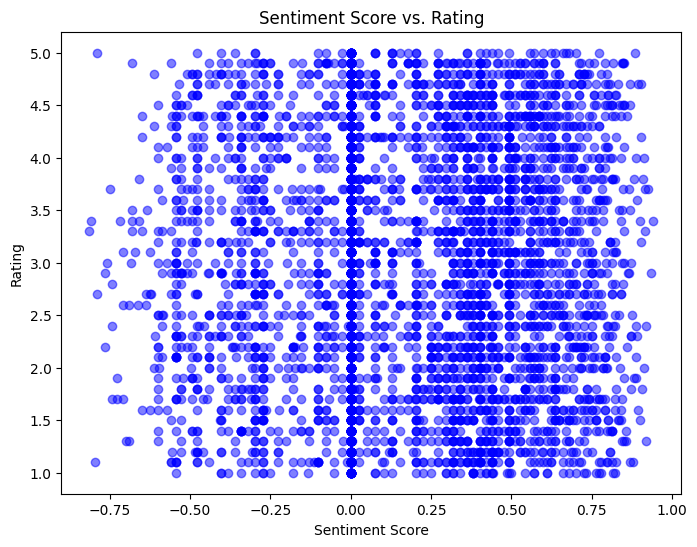


Sentiment vs. Rating Analysis:
  Sentiment Category  Avg_Customer_Rating  Count
0           Negative             2.970513    936
1            Neutral             3.028508   1582
2           Positive             2.998791   2482


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('Fast Delivery Agent Reviews.csv')

# Check the first few rows of the data
print(df.head())

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score for each review
def get_sentiment_score(review):
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']

# Apply sentiment analysis to the 'Review Text' column
df['Sentiment Score'] = df['Review Text'].apply(get_sentiment_score)

# Categorize sentiment into Positive, Neutral, or Negative
def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
df['Sentiment Category'] = df['Sentiment Score'].apply(sentiment_category)

# Sentiment Summary
sentiment_summary = df['Sentiment Category'].value_counts()
print("Sentiment Summary:")
print(sentiment_summary)

# Visualization of the sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_summary.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment Category')
plt.xticks(rotation=0)
plt.show()

# Create Wordclouds for Positive, Negative, and Neutral reviews
def generate_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment Category'] == sentiment]['Review Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

# Wordclouds for each sentiment category
generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')

# Sentiment and Rating Correlation: Explore if higher sentiment scores correlate with higher ratings
sentiment_rating_corr = df[['Sentiment Score', 'Rating']].corr()
print("\nCorrelation between Sentiment Score and Rating:")
print(sentiment_rating_corr)

# Visualize the relationship between sentiment score and rating
plt.figure(figsize=(8, 6))
plt.scatter(df['Sentiment Score'], df['Rating'], alpha=0.5, color='blue')
plt.title('Sentiment Score vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

# Sentiment vs Rating Analysis: Group by sentiment and analyze the average rating
sentiment_rating_analysis = df.groupby('Sentiment Category').agg(
    Avg_Customer_Rating=('Rating', 'mean'),
    Count=('Rating', 'size')
).reset_index()
print("\nSentiment vs. Rating Analysis:")
print(sentiment_rating_analysis)

# Save the sentiment analysis results to CSV
df.to_csv('Sentiment_Analysis_Results.csv', index=False)
